In [1]:
%pylab notebook
import pandas as pd
import dask.dataframe as dd
import os,sys
import logging
import fastparquet
import gc
import cPickle as pickle 

Populating the interactive namespace from numpy and matplotlib


In [2]:
sys.path.insert(0,"../python/")

### A

In [3]:
from zillow import features,config
reload (features)

<module 'zillow.features' from '../python/zillow/features.pyc'>

In [4]:
def read_error(state,year):
    fname=os.path.join(config.get_state_year_folder2(state,year),'lgbchain_prediction_merged.parq')
    #y=features.get('sale_price_zip5',state,year)
    lati=features.get('longi_lati',state,year)
    month=features.get('month',state,year)
    df=pd.concat([dd.read_parquet(fname)['error'].compute(),lati,month],axis=1).dropna()
    df['year']=(df['month']/100).astype(np.int32)
    df['month']=(df['month']-df['year']*100).astype(np.int32)
    df['abserror']=df['error'].abs()
    return df

In [5]:
def read_state_error(state):
    return pd.concat([read_error(state,year) for year in config.YEARS],0)
        


In [6]:
df = read_state_error('19')

In [7]:
df.shape

(229136, 6)

In [8]:
df[['year','error','abserror']].groupby('year').aggregate(['mean','std','median','count'])

error                             abserror                           
          mean       std    median  count      mean       std    median  count
year                                                                          
2007  0.033051  0.407589 -0.000847  26134  0.210843  0.350379  0.093131  26134
2008  0.036614  0.379247 -0.000438  19517  0.196333  0.326528  0.085998  19517
2009  0.044670  0.358082  0.000257  17786  0.184245  0.310275  0.082818  17786
2010  0.047577  0.363333 -0.000171  16152  0.191684  0.312298  0.086327  16152
2011  0.048935  0.396129 -0.000352  16290  0.205453  0.342197  0.091545  16290
2012  0.040651  0.392933  0.000049  20073  0.204623  0.337900  0.089879  20073
2013  0.038732  0.381997 -0.000706  25706  0.190610  0.333299  0.083300  25706
2014  0.029162  0.378765  0.000011  23960  0.182381  0.333241  0.080930  23960
2015  0.022243  0.389961  0.000063  23631  0.177593  0.347885  0.074995  23631
2016 -0.013293  0.520459  0.001119  16645  0.192385  0.483777  0.076516  16645
2017  0.031308  0.345980 -0.000073  16695  0.162816  0.306874  0.075419  16695
2018  0.022233  0.300934  0.002086   6547  0.152525  0.260362  0.074289   6547

In [9]:
grouped=df[df.year==2018][['month','error','abserror']].groupby('month').aggregate(['mean','std','median','count'])
grouped

error                            abserror                          
           mean       std    median count      mean       std    median count
month                                                                        
1      0.032195  0.334356  0.005066  1009  0.173204  0.287754  0.084176  1009
2      0.002845  0.303560 -0.005888   767  0.153638  0.261766  0.072403   767
3      0.025419  0.275141  0.008957  1342  0.145461  0.234893  0.074399  1342
4      0.009597  0.307277 -0.006095  1437  0.151513  0.267469  0.072248  1437
5      0.030847  0.300338  0.000758  1767  0.149085  0.262519  0.071999  1767
6      0.037697  0.234539  0.019517   225  0.131611  0.197578  0.065459   225

In [10]:
grouped=df[df.year<2018][['month','error','abserror']].groupby('month').aggregate(['mean','std','median','count'])
grouped

error                             abserror                      \
           mean       std    median  count      mean       std    median   
month                                                                      
1      0.047046  0.424082  0.002503  10858  0.208884  0.372052  0.087019   
2      0.046778  0.429902  0.001807  10270  0.208199  0.379016  0.084898   
3      0.048667  0.381349  0.001075  15174  0.192260  0.332910  0.082565   
4      0.050562  0.390636  0.001951  18066  0.190204  0.344925  0.080697   
5      0.041413  0.356077 -0.000064  22898  0.173277  0.313815  0.077811   
6      0.030924  0.336047  0.000464  29027  0.164758  0.294512  0.075315   
7      0.014459  0.472110  0.001392  24516  0.195828  0.429822  0.079764   
8      0.029086  0.366992 -0.003074  22817  0.183104  0.319375  0.082284   
9      0.034623  0.387812 -0.002923  18022  0.199324  0.334462  0.088601   
10     0.036353  0.401029  0.000865  18710  0.206264  0.345831  0.089888   
11     0.025618  0.384833 -0.000357  16807  0.197276  0.331409  0.090910   
12     0.002204  0.424252 -0.005570  15424  0.213970  0.366345  0.095165   

              
       count  
month         
1      10858  
2      10270  
3      15174  
4      18066  
5      22898  
6      29027  
7      24516  
8      22817  
9      18022  
10     18710  
11     16807  
12     15424

<IPython.core.display.Javascript object>


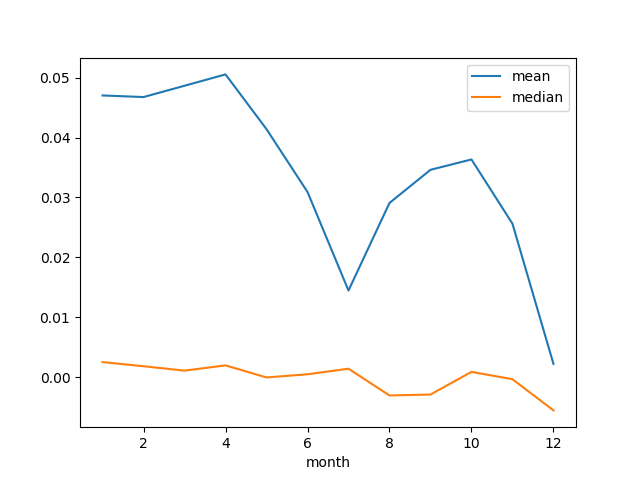

In [11]:
grouped['error'][['mean','median']].plot();

<IPython.core.display.Javascript object>


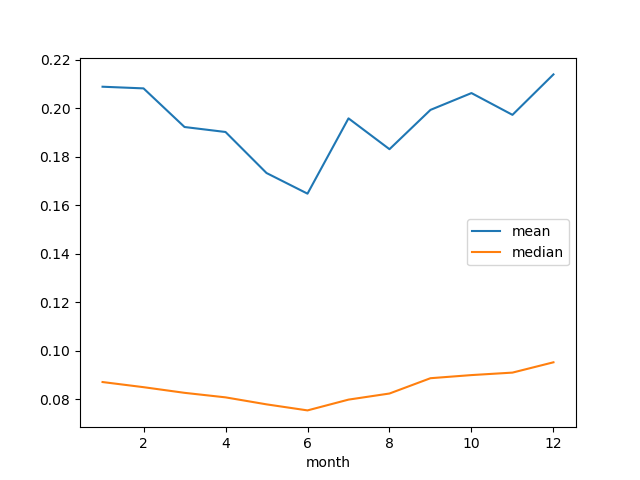

In [12]:
grouped['abserror'][['mean','median']].plot();

In [13]:
df.head()

error  longitude   latitude  month  year  abserror
parcelid                                                       
47141591  1.370098 -91.473480  43.500401      5  2007  1.370098
47141770  2.706378 -91.382652  43.463249      6  2007  2.706378
47141813 -0.676309 -91.456474  43.450020     11  2007  0.676309
47141944  2.187160 -91.306564  43.493965      6  2007  2.187160
47142083 -0.281278 -91.285667  43.498119     11  2007  0.281278

In [14]:
def plot3d(subdf,col):
    import os
    import numpy as np
    from mpl_toolkits.mplot3d import Axes3D
    import matplotlib.pyplot as plt
    from scipy.interpolate import griddata


    fig = plt.figure()
    ax = Axes3D(fig)
    # my_data = np.genfromtxt('2014_0.01_v3_HDF5.txt', delimiter = ',',     skip_header = 1)
    # my_data[my_data==0] = np.nan 
    # my_data = my_data[~np.isnan(my_data).any(axis=1)]
    X = subdf.longitude.values
    Y = subdf.latitude.values
    Z = subdf[col].values
    xi = np.linspace(X.min(),X.max(),(len(Z)/3))
    yi = np.linspace(Y.min(),Y.max(),(len(Z)/3))
    zi = griddata((X, Y), Z, (xi[None,:], yi[:,None]), method='nearest')

    xig, yig = np.meshgrid(xi, yi)

    surf = ax.plot_surface(xig, yig, zi, cmap='gist_earth')
    fig.colorbar(surf, shrink=0.5, aspect=5)
    ax.set_xlabel('Latitude')
    ax.set_ylabel('Longitude')
    ax.set_zlabel('error ')
    #ax.set_zlim3d(Z.min(),Z.max())

In [15]:
subdf=df.iloc[np.random.permutation(range(len(df)))[:2000]]

In [20]:
subdf=df[df.year==2018]
subdf=df.iloc[np.random.permutation(range(len(subdf)))[:2000]]

<IPython.core.display.Javascript object>


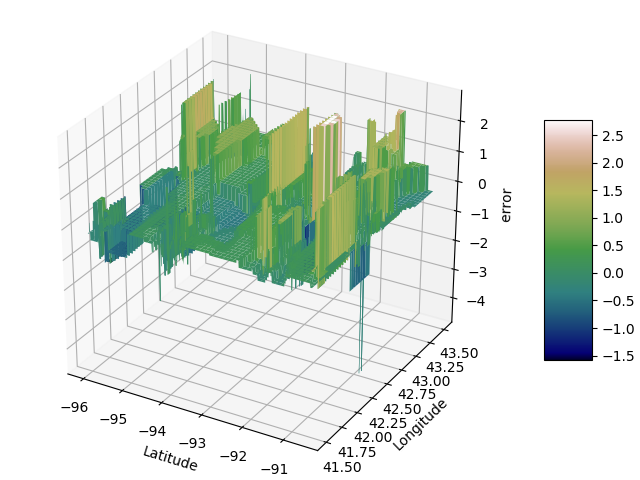

In [21]:
plot3d(subdf,'error')

<IPython.core.display.Javascript object>


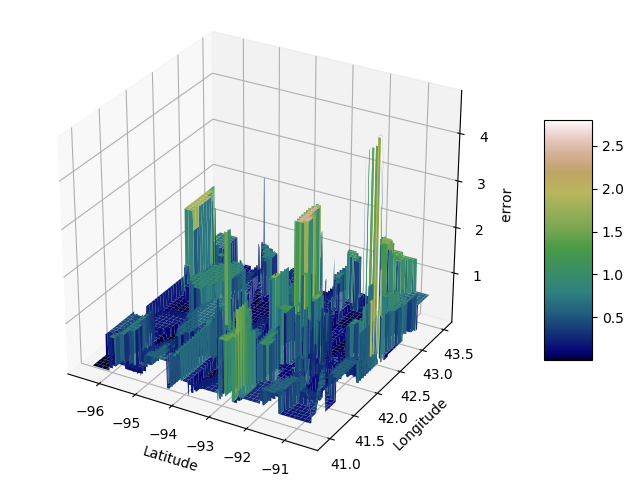

In [19]:
plot3d(subdf,'abserror')

In [22]:
subdf=df[df.year==2017]
subdf=df.iloc[np.random.permutation(range(len(subdf)))[:2000]]

<IPython.core.display.Javascript object>


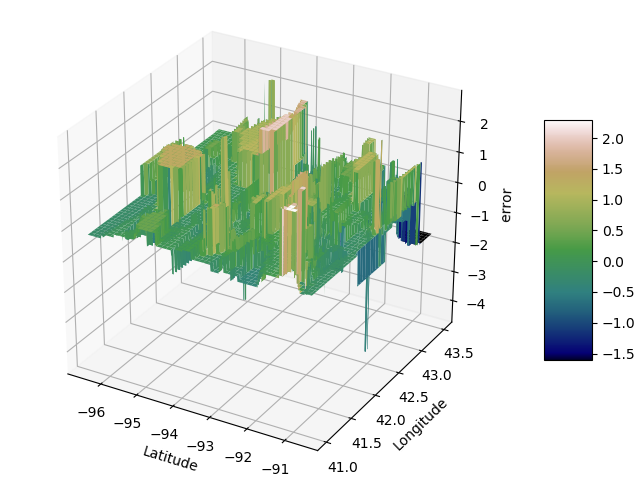

In [23]:
plot3d(subdf,'error')

<IPython.core.display.Javascript object>


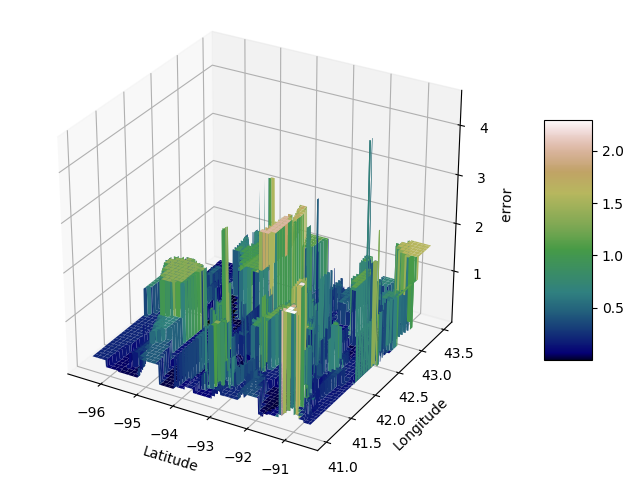

In [24]:
plot3d(subdf,'abserror')